<a href="https://colab.research.google.com/github/Kimuksung/bigdata/blob/master/%EB%8B%A4%EC%A4%91_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
from datetime import datetime , timedelta
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
plant1_train = pd.read_csv("/gdrive/My Drive/Plain/plant1_train.csv")
plant2_train = pd.read_csv("/gdrive/My Drive/Plain/plant2_train.csv")

In [0]:
plant1_train = plant1_train.drop('Unnamed: 0' , axis=1)
cols = ['Date' , 'loc1_tem', 'loc1_hum', 'loc1_coil_temp','loc2_tem', 'loc2_hum', 'loc2_coil_temp' , 'loc3_tem', 'loc3_hum', 'loc3_coil_temp', 'out_tem', 'out_hum', 'loc1' , 'loc2' , 'loc3']
plant1_train.columns = cols

plant1_train_first = plant1_train[['Date','loc1_tem', 'out_tem' , 'loc1_coil_temp','loc1_hum' ,'out_hum','loc1']]


date_trans = []
for i in range(0,len(plant1_train)):
    date_trans.append(datetime.strptime(plant1_train_first['Date'][i] , '%Y-%m-%d %H:%M'))

plant1_train_first['date_trans'] = date_trans
plant1_train_first

hour24_temp = []
hour24_hum = []
for i in range(0,len(plant1_train_first)):
    tmp = datetime.strptime(plant1_train_first['Date'][i]  , '%Y-%m-%d %H:%M') + timedelta(days=1)
    tmp1 = datetime.strptime(plant1_train_first['Date'][i]  , '%Y-%m-%d %H:%M')
    if(len(plant1_train_first[plant1_train_first['date_trans']==tmp]) > 0 ):
        loc_24hour = plant1_train_first[plant1_train_first['date_trans']==tmp]
        print("this", float(loc_24hour['loc1_coil_temp'].values))
        print("-"*10)
        hour24_temp.append(float(loc_24hour['loc1_coil_temp'].values))
        hour24_hum.append(float(loc_24hour['loc1_hum'].values))
    else:
        hour24_temp.append(float('NaN'))
        hour24_hum.append(float('NaN'))

plant1_train_first['24hourtemp'] = hour24_temp
plant1_train_first['24hourhum'] = hour24_hum

plant1_train_first_24 = plant1_train_first.dropna(axis=0)

plant1_train_first_24["Hour"] = plant1_train_first_24["date_trans"].apply(lambda x: x.hour)

plant1_train_first_24["dayofyear"] = plant1_train_first_24["date_trans"].apply(lambda x: x.dayofyear)

plant1_train_first_24
plant1_train_first_24.columns
#Index(['loc1_coil_temp', 'loc1_hum', '24hourtemp', '24hourhum', 'Hour','dayofyear']
plant1_train_first_24.date_trans

plant1_train_first_24 = plant1_train_first_24.drop(['Date', 'loc1_tem', 'out_tem', 'out_hum','date_trans','loc1'], axis=1)
plant1_train_first_24

In [0]:
rand_idx = np.random.choice(57400  , 1600)
train_rand_idxs = rand_idx[:800]
val_rand_idxs = rand_idx[800:1200]
test_rand_idxs = rand_idx[1200:]

X = plant1_train_first_24.iloc[train_rand_idxs,:]
#X_train = X.loc[:,['loc1_coil_temp','loc1_hum', 'Hour' , 'dayofyear']]
X_train = X.loc[:,['loc1_coil_temp','loc1_hum']]
#X_test = X.loc[:,['24hourtemp','24hourhum']]
X_test = X.loc[:,['24hourtemp']]

Y = plant1_train_first_24.iloc[test_rand_idxs,:]
#Y_train = Y.loc[:,['loc1_coil_temp','loc1_hum', 'Hour' , 'dayofyear']]
Y_train = Y.loc[:,['loc1_coil_temp','loc1_hum']]
#Y_test = Y.loc[:,['24hourtemp','24hourhum']]
Y_test = Y.loc[:,['24hourtemp']]

T = plant1_train_first_24.iloc[val_rand_idxs,:]
#T_train = T.loc[:,['loc1_coil_temp','loc1_hum', 'Hour' , 'dayofyear']]
T_train = T.loc[:,['loc1_coil_temp','loc1_hum']]
#T_test = T.loc[:,['24hourtemp','24hourhum']]
T_test = T.loc[:,['24hourtemp']]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(T_train.shape)
print(T_test.shape)

(800, 2)
(800, 1)
(400, 2)
(400, 1)
(400, 2)
(400, 1)


In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(16, input_dim= 2, activation='relu'))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam' , loss = 'mse', metrics=['accuracy'])

In [0]:
model.fit(X_train, X_test, epochs=1500, batch_size=32)

Epoch 1/1500
800/800 [==============================] - 0s 110us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 2/1500
800/800 [==============================] - 0s 31us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 3/1500
800/800 [==============================] - 0s 32us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 4/1500
800/800 [==============================] - 0s 32us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 5/1500
800/800 [==============================] - 0s 31us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 6/1500
800/800 [==============================] - 0s 31us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 7/1500
800/800 [==============================] - 0s 30us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 8/1500
800/800 [==============================] - 0s 32us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 9/1500
800/800 [==============================] - 0s 39us/step - loss: 364.7556 - accuracy: 0.0000e+00
Epoch 10/1500
800/

In [0]:
scores = model.evaluate(Y_train, Y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

400/400 [==============================] - 0s 58us/step
accuracy: 0.00%


In [0]:
y_pred=model.predict(Y_train)
#ttt=pd.DataFrame({"real" : Y_test , "y_pred" : y_pred})
#ttt
X_test

,24hourtemp
14248,17.20
42309,0.60
46199,3.00
11258,6.13
53909,8.46
...,...
40059,11.51
35412,17.96
45456,1.48
11382,-2.34


----------------------------------------
이부분은 원래 영역 위에 부분 잘 되는지 해봄

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
T_train = np.array(T_train)

x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_val = np.reshape(T_train, (T_train.shape[0], T_train.shape[1], 1))
x_test = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_shape= (4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 66        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
#model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [0]:
X_test.shape

(800, 2)

In [0]:
X_test = np.array(X_test)
T_test = np.array(T_test)
Y_test = np.array(Y_test)
hist = model.fit(X_train, X_test, epochs=1000, batch_size=32, validation_data=(T_train, T_test))

Train on 800 samples, validate on 400 samples
Epoch 1/1000
800/800 [==============================] - 0s 121us/step - loss: 105.0338 - val_loss: 57.9199
Epoch 2/1000
800/800 [==============================] - 0s 50us/step - loss: 60.6571 - val_loss: 59.7787
Epoch 3/1000
800/800 [==============================] - 0s 47us/step - loss: 60.4995 - val_loss: 58.6045
Epoch 4/1000
800/800 [==============================] - 0s 47us/step - loss: 58.5574 - val_loss: 58.0830
Epoch 5/1000
800/800 [==============================] - 0s 48us/step - loss: 57.8330 - val_loss: 55.6407
Epoch 6/1000
800/800 [==============================] - 0s 51us/step - loss: 57.7253 - val_loss: 56.8363
Epoch 7/1000
800/800 [==============================] - 0s 53us/step - loss: 58.3833 - val_loss: 55.9766
Epoch 8/1000
800/800 [==============================] - 0s 50us/step - loss: 57.0386 - val_loss: 56.3598
Epoch 9/1000
800/800 [==============================] - 0s 52us/step - loss: 58.3453 - val_loss: 54.5530
Epoch 1

KeyError: ignored

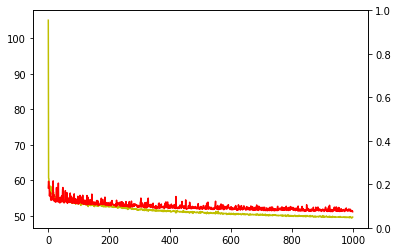

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()